**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
library(UpSetR)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data files**

In [2]:
fdiry = file.path(FD_RES, "results", "region", "annotation_enhancer_merge")
for (txt in dir(fdiry)){cat(txt, "\n")}

annotation_ccre 
description.tsv 
enhancer_merge.concat.starrmpra_crispr_atac.active.bed.gz 
enhancer_merge.concat.starrmpra_crispr_atac.active.merge.bed.gz 
enhancer_merge.concat.starrmpra_crispr_atac.active.merge.merge.bed.gz 
enhancer_merge.concat.starrmpra_crispr_atac.total.bed.gz 
enhancer_merge.concat.starrmpra_crispr_atac.total.merge.bed.gz 
enhancer_merge.concat.starrmpra_crispr_atac.total.merge.merge.bed.gz 
summary_starrmpra_crispri_atac 
tmp 


## Import data

In [3]:
fdiry = file.path(FD_RES, "results", "region", "annotation_enhancer_merge")
fname = "enhancer_merge.concat.starrmpra_crispr_atac.total.merge.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Assay_Type", "Assay_Label")
dat = read_tsv(fpath, col_names=cnames, show_col_types=FALSE)
dat = dat %>% 
    dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End)) %>%
    dplyr::select(Chrom, Start, End, Region, Assay_Type, Assay_Label)

dat_region_merge_import = dat
print(dim(dat))
head(dat)

[1] 356442      6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ATAC,ATAC
chr1,14253,14645,chr1:14253-14645,ATAC,ATAC
chr1,16015,16477,chr1:16015-16477,ATAC,ATAC
chr1,17237,17772,chr1:17237-17772,ATAC,ATAC
chr1,28903,29613,chr1:28903-29613,ATAC,ATAC
chr1,30803,31072,chr1:30803-31072,ATAC,ATAC


In [15]:
dat = dat_region_merge_import
txt = "ASTARR"
dat = dat %>% dplyr::filter(Assay_Type == txt)
table(dat$Assay_Label)


          ASTARR_A ASTARR_A,ASTARR_AB  ASTARR_A,ASTARR_R           ASTARR_R 
               217                 26                 20                565 

## Arrange and summary

In [4]:
dat = dat_region_merge_import
for (x in unique(dat$Assay_Type))
    print(x)

[1] "ATAC"
[1] "ATAC,ENCODE-E2G_Prediction"
[1] "ASTARR,ATAC"
[1] "ATAC,WSTARR"
[1] "LMPRA"
[1] "ATAC,CRISPRi-Growth"
[1] "ENCODE-E2G_Prediction"
[1] "ASTARR,ATAC,ENCODE-E2G_Prediction,LMPRA,WSTARR"
[1] "WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,ENCODE-E2G_Prediction,LMPRA,WSTARR"
[1] "ATAC,ENCODE-E2G_Prediction,LMPRA"
[1] "ASTARR,ATAC,ENCODE-E2G_Prediction,LMPRA"
[1] "ATAC,ENCODE-E2G_Prediction,WSTARR"
[1] "ATAC,ENCODE-E2G_Prediction,LMPRA,WSTARR"
[1] "ASTARR,ATAC,ENCODE-E2G_Prediction"
[1] "ASTARR,ATAC,ENCODE-E2G_Prediction,WSTARR"
[1] "CRISPRi-Growth"
[1] "ASTARR,ATAC,WSTARR"
[1] "ASTARR"
[1] "ASTARR,WSTARR"
[1] "ASTARR,ATAC,LMPRA"
[1] "ENCODE-E2G_Prediction,LMPRA"
[1] "ATAC,LMPRA,WSTARR"
[1] "ENCODE-E2G_Prediction,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,ENCODE-E2G_Prediction"
[1] "CRISPRi-Growth,WSTARR"
[1] "ATAC,LMPRA"
[1] "ATAC,CRISPRi-Growth,ENCODE-E2G_Prediction,LMPRA,WSTARR"
[1] "ASTARR,ATAC,LMPRA,WSTARR"
[1] "ATAC,CRISPRi-Growth,WSTARR"
[1] "LMPRA,WSTARR"
[1] "ATAC,ENCODE-E2G_B

In [5]:
dat = dat_region_merge_import
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

dat_region_merge_arrange = dat
print(dim(dat))
head(dat)

[1] 493939      6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ATAC,ATAC
chr1,14253,14645,chr1:14253-14645,ATAC,ATAC
chr1,16015,16477,chr1:16015-16477,ATAC,ATAC
chr1,17237,17772,chr1:17237-17772,ATAC,ATAC
chr1,28903,29613,chr1:28903-29613,ATAC,ATAC
chr1,30803,31072,chr1:30803-31072,ATAC,ATAC


**Check results**

In [6]:
vec = paste0("chr", c(1:22, "X"))
dat = dat_region_merge_arrange
dat = dat %>% dplyr::filter(Chrom %in% vec, Assay_Type == "TMPRA")
table(dat$Chrom)


chr11 chr16  chr2 chr20  chr8  chrX 
 2107   777   967  1146  1378  1418 

## Upset plot by Assay Type

In [7]:
dat = dat_region_merge_arrange
lst = split(dat$Region, dat$Assay_Type)

lst_region = lst
lst = lapply(lst, length)
print(lst)

$ASTARR
[1] 19465

$ATAC
[1] 247228

$`CRISPRi-Growth`
[1] 6168

$`CRISPRi-HCRFF`
[1] 75

$`ENCODE-E2G_Benchmark`
[1] 381

$`ENCODE-E2G_Prediction`
[1] 45410

$LMPRA
[1] 38888

$TMPRA
[1] 7793

$WSTARR
[1] 128531



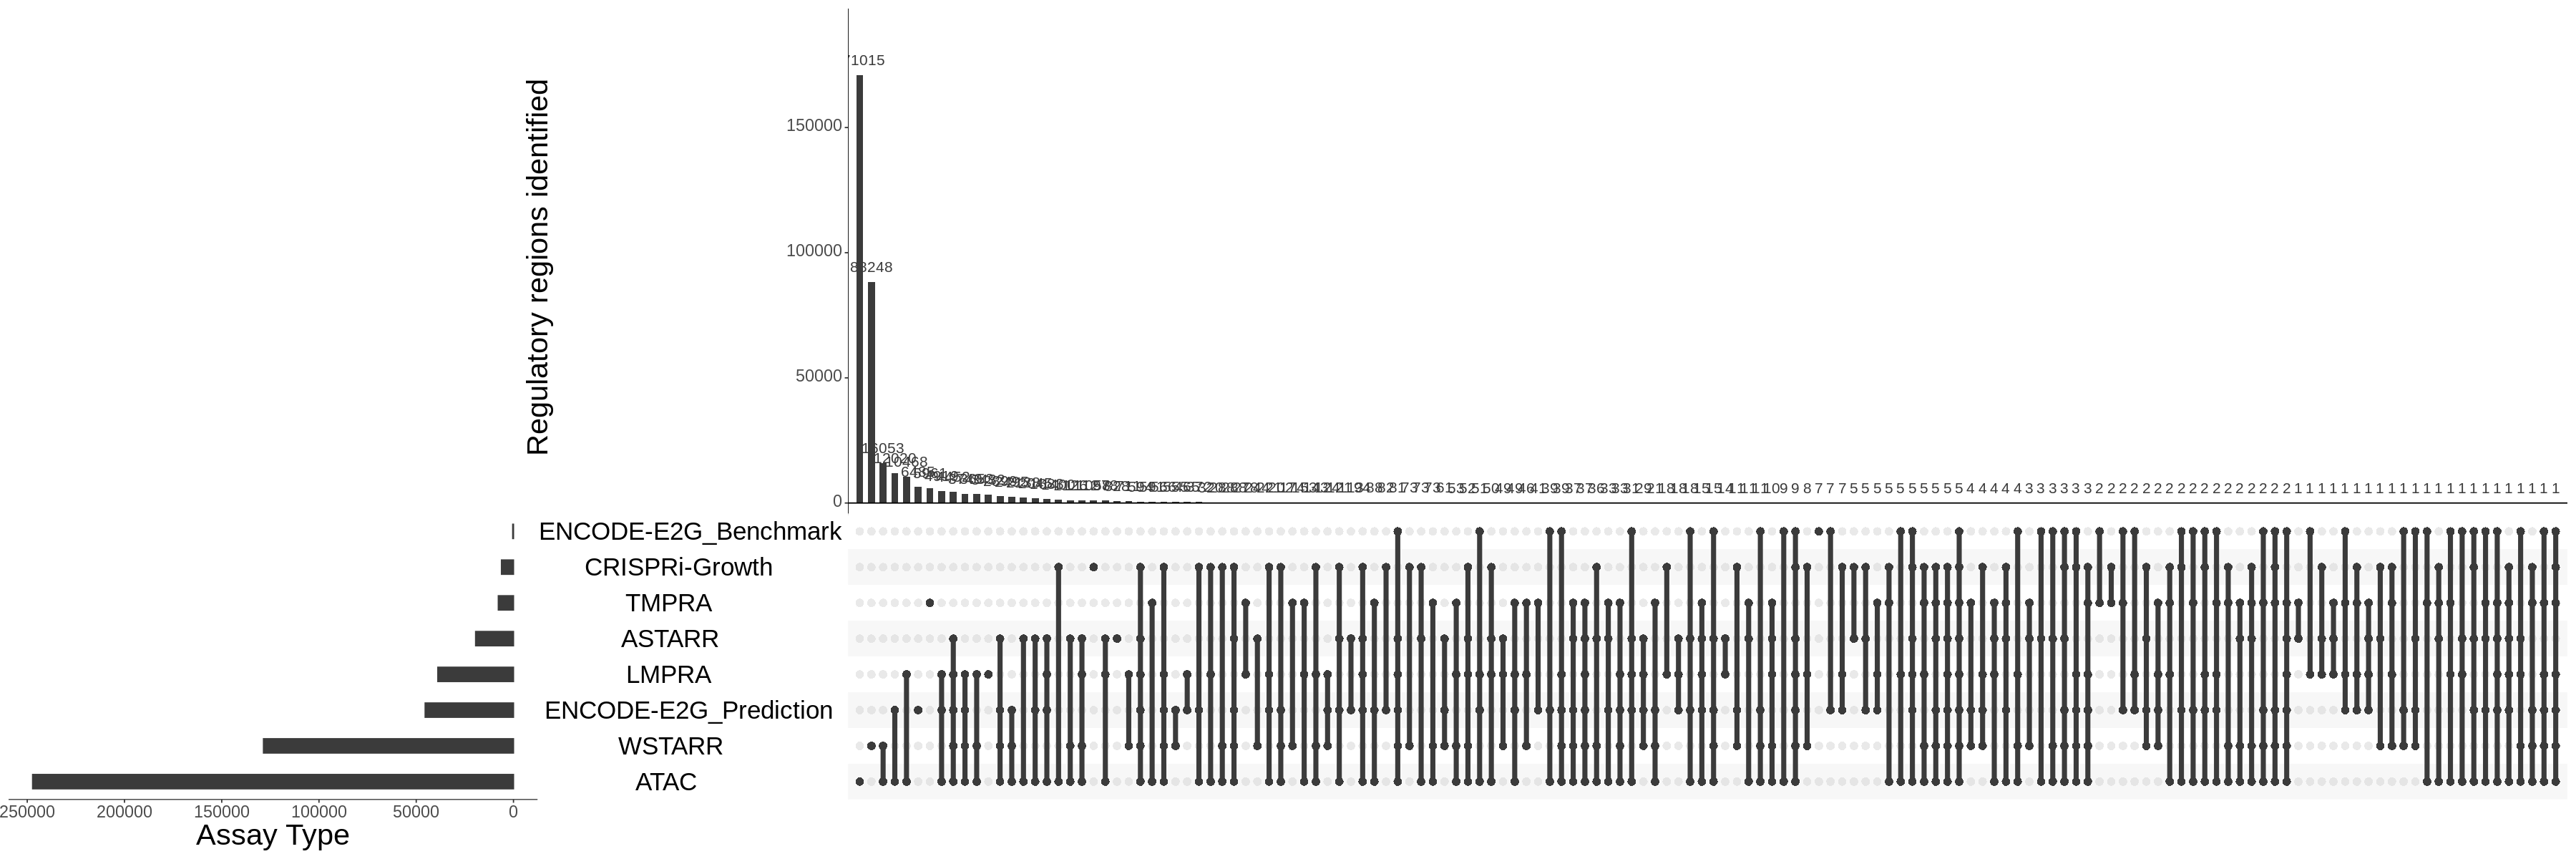

In [8]:
lst = lst_region

options(repr.plot.height=10, repr.plot.width=30)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 8,
      nintersects = NA,
      number.angles = 0,
      point.size = 3, 
      line.size  = 2,
      mb.ratio = c(0.6, 0.4),
      mainbar.y.label = "Regulatory regions identified", 
      sets.x.label    = "Assay Type", 
      text.scale = c(
          3, # upper barplot y axis title
          2, # upper barplot y axis text
          3, # left  barplot y axis title
          2, # left  barplot y axis text
          3, # set title
          2  # upper barplot count number
      )
)

## Upset plot by Assay Group (STARR / MPRA / CRISPRi / ENCODE-E2G / ATAC)

In [9]:
dat = dat_region_merge_arrange
dat = dat %>% 
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "CRISPRi"),
            "CRISPRi",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "STARR"),
            "STARR",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "MPRA"),
            "MPRA",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "ENCODE-E2G"),
            "ENCODE-E2G",
            Assay_Type
        )
    )

dat_region_merge_summary = dat
table(dat$Assay_Type)


      ATAC    CRISPRi ENCODE-E2G       MPRA      STARR 
    247228       6243      45791      46681     147996 

In [10]:
dat = dat_region_merge_summary
lst = split(dat$Region, dat$Assay_Type)

lst_region = lst
lst = lapply(lst, length)
print(lst)

$ATAC
[1] 247228

$CRISPRi
[1] 6243

$`ENCODE-E2G`
[1] 45791

$MPRA
[1] 46681

$STARR
[1] 147996



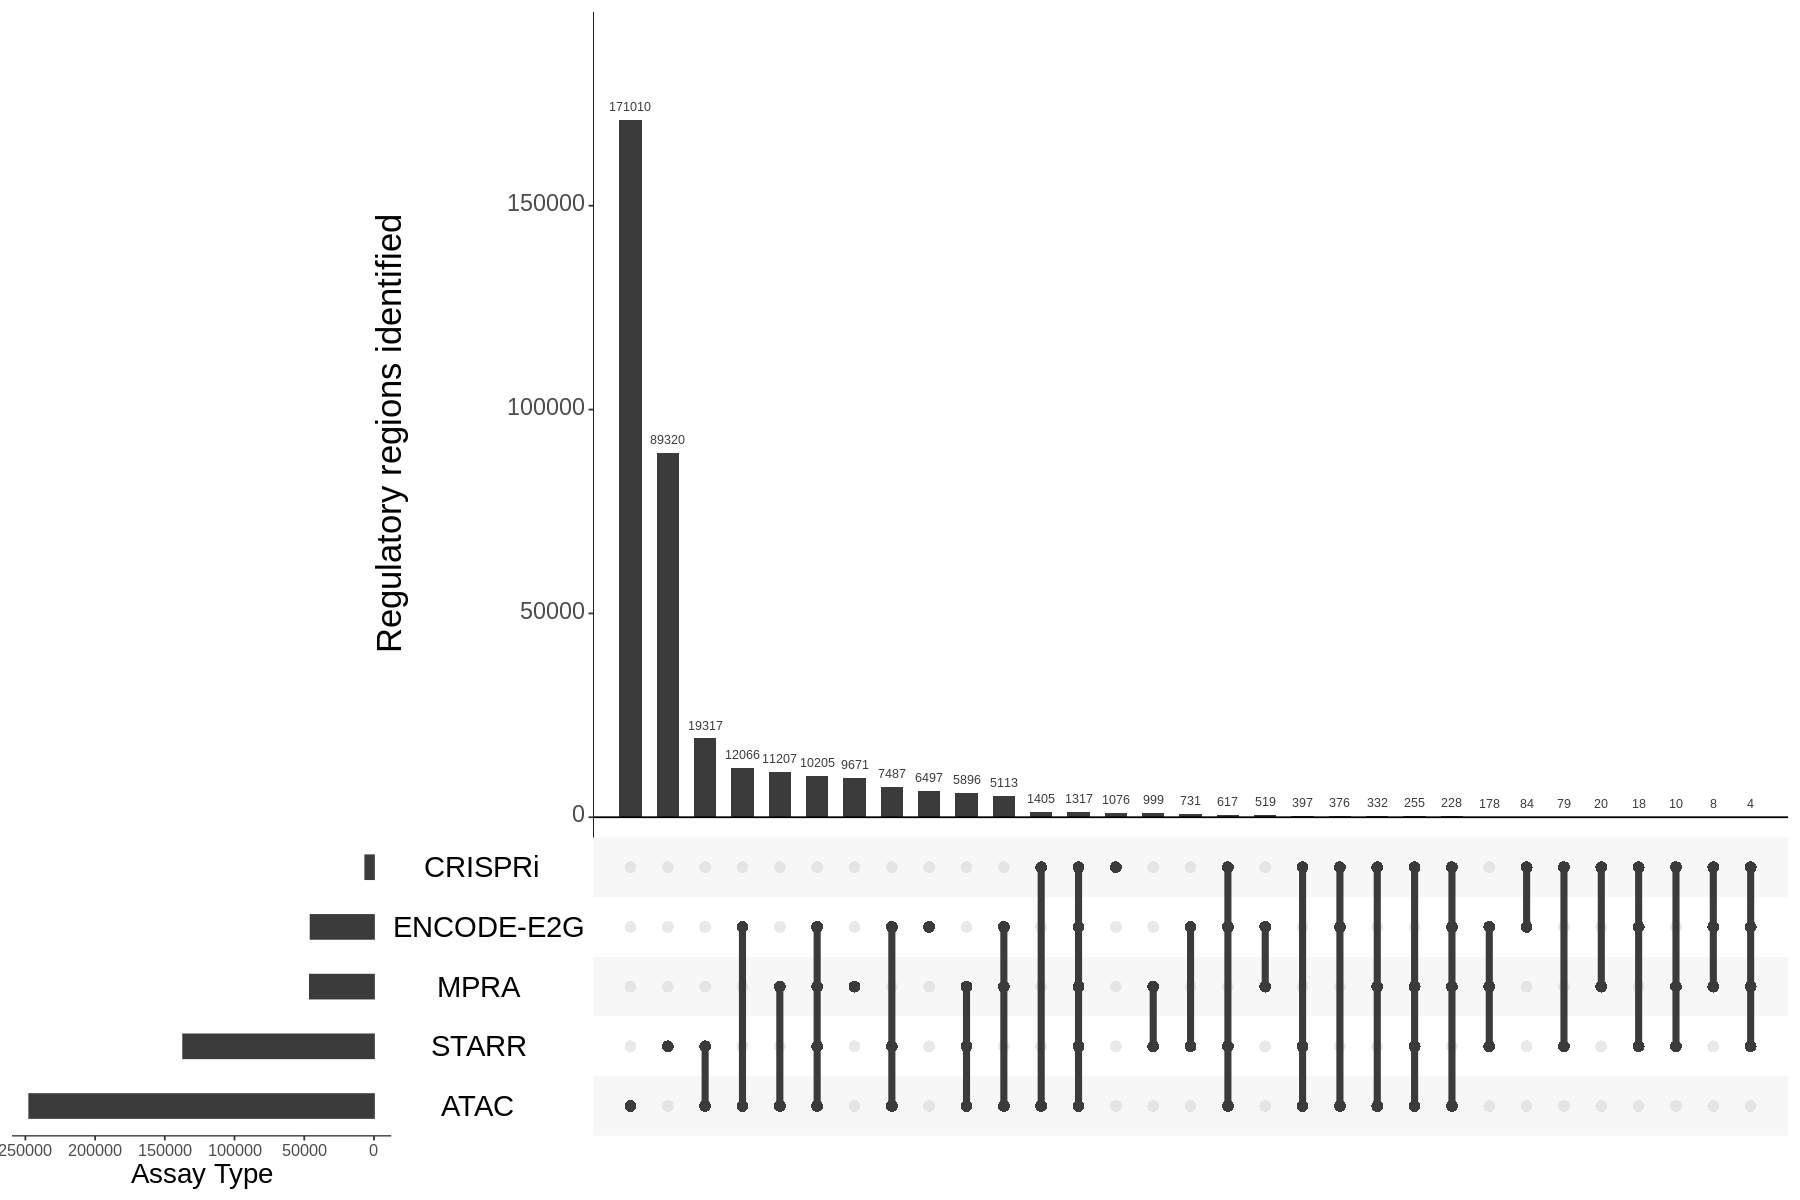

In [11]:
lst = lst_region

options(repr.plot.height=10, repr.plot.width=15)
upset(fromList(lst), 
      order.by = "freq", 
      nsets = 8,
      nintersects = NA,
      number.angles = 0,
      point.size = 3, 
      line.size  = 2,
      #mb.ratio = c(0.8, 0.2),
      mainbar.y.label = "Regulatory regions identified", 
      sets.x.label    = "Assay Type", 
      text.scale = c(
          2.5, # upper barplot y axis title
          2, # upper barplot y axis text
          2, # left  barplot y axis title
          1.4, # left  barplot y axis text
          2.5, # set title
          1.2  # upper barplot count number
      )
)

## Percentage of ATAC in each assay

In [12]:
dat = dat_region_merge_arrange
lst = split(dat$Region, dat$Assay_Type)
vec = lst[["ATAC"]]

vec_txt_region_atac = vec
lst_vec_txt_region  = lst
print(names(lst))
print(length(vec))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction"
[7] "LMPRA"                 "TMPRA"                 "WSTARR"               
[1] 247228


In [13]:
lst = lst_vec_txt_region

lst = lapply(lst, function(vec_txt_region){
    vec = vec_txt_region %in% vec_txt_region_atac
    num_atac  = sum(vec)
    num_total = length(vec_txt_region)
    
    vec = c(num_atac, num_total)
    names(vec) = c("Count_ATAC", "Count_Total")
    return(vec)
})

dat = bind_rows(lst, .id = "Assay")
dat = dat %>% 
    dplyr::mutate(
        Freq_ATAC   = Count_ATAC / Count_Total,
        Count_Label = ifelse(
            Count_Total > 1000, 
            paste0(round(Count_Total / 1000), "K"),
            Count_Total
        )
    ) %>%
    dplyr::mutate(
        Assay_Label = paste0(Assay, " (", Count_Label, ")")
    )

dat_region_merge_isATAC = dat
dat

Assay,Count_ATAC,Count_Total,Freq_ATAC,Count_Label,Assay_Label
<chr>,<int>,<int>,<dbl>,<chr>,<chr>
ASTARR,18088,19465,0.9292576,19K,ASTARR (19K)
ATAC,247228,247228,1.0000000,247K,ATAC (247K)
CRISPRi-Growth,4889,6168,0.7926394,6K,CRISPRi-Growth (6K)
CRISPRi-HCRFF,55,75,0.7333333,75,CRISPRi-HCRFF (75)
ENCODE-E2G_Benchmark,357,381,0.9370079,381,ENCODE-E2G_Benchmark (381)
ENCODE-E2G_Prediction,37381,45410,0.8231887,45K,ENCODE-E2G_Prediction (45K)
LMPRA,33669,38888,0.8657941,39K,LMPRA (39K)
TMPRA,1267,7793,0.1625818,8K,TMPRA (8K)
WSTARR,38179,128531,0.2970412,129K,WSTARR (129K)


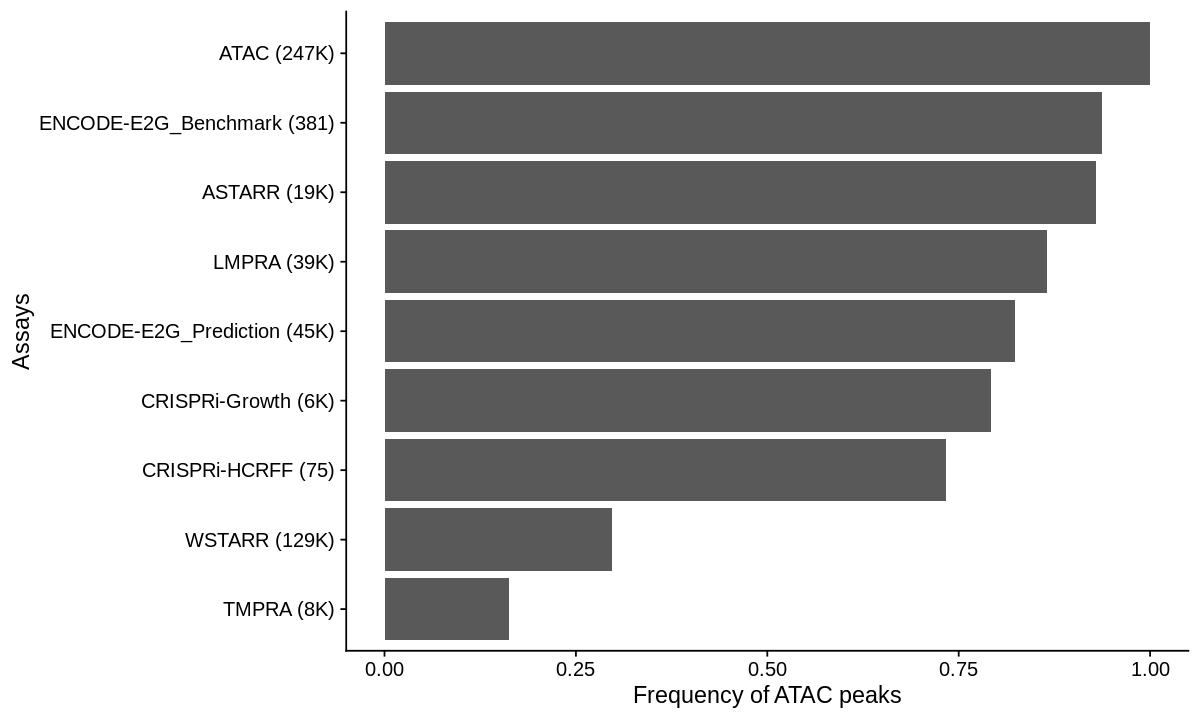

In [14]:
dat = dat_region_merge_isATAC
dat = dat %>% 
    dplyr::arrange(Freq_ATAC) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Freq_ATAC, y=Assay_Label)) + 
    geom_col() + 
    labs(x="Frequency of ATAC peaks", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)